Exercise 1 
In this chapter I claim that analyze1 takes time proportional to n3 and analyze2 takes time proportional to n2. To see if that’s true, run them on a range of input sizes and time them. In Jupyter, you can use the “magic command” %timeit.
If you plot run time versus input size on a log-log scale, you should get a straight line with slope 3 for analyze1 and slope 2 for analyze2.
You also might want to test dct_iv and scipy.fftpack.dct.

在本章中，我聲稱analyst1花費的時間與n3成正比，analyze2花費的時間與n2成比例。要查看是否正確，請在各種輸入大小上運行它們併計時。在Jupyter中，您可以使用“魔術命令”％timeit。
如果在對數對數標度上繪製運行時間與輸入大小的關係，則應該獲得一條直線，其中analyzer1的斜率為3，analyzer2的斜率為2。
您可能還需要測試dct_iv和scipy.fftpack.dct。

In [1]:

from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import scipy.fftpack

import warnings
warnings.filterwarnings('ignore')

import dct

#%matplotlib inline

In [2]:
signal = thinkdsp.UncorrelatedGaussianNoise()
noise = signal.make_wave(duration=1.0, framerate=16384)
noise.ys.shape

(16384,)

In [3]:

ns = 2 ** np.arange(6, 15)
ns

array([   64,   128,   256,   512,  1024,  2048,  4096,  8192, 16384],
      dtype=int32)

In [4]:

def plot_bests(bests):    
    thinkplot.plot(ns, bests)
    thinkplot.config(xscale='log', yscale='log', legend=False)
    
    x = np.log(ns)
    y = np.log(bests)
    t = scipy.stats.linregress(x,y)
    slope = t[0]

    return slope

analyze1的結果。

64
128 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
128
363 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
256
1.75 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
512
13.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
67.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
352 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4096
1.43 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8192
6.11 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16384
45.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


2.332592180842974

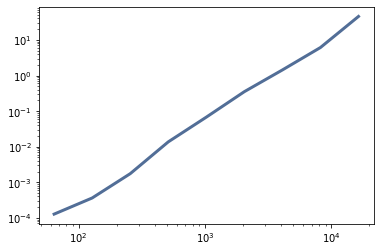

In [5]:
results = []
for N in ns:
    print(N)
    ts = (0.5 + np.arange(N)) / N
    freqs = (0.5 + np.arange(N)) / 2
    ys = noise.ys[:N]
    result = %timeit -r1 -o dct.analyze1(ys, freqs, ts)
    results.append(result)

bests = [result.best for result in results]
plot_bests(bests)

估計的斜率接近2，而不是預期的3。一種可能性是，在此數組大小範圍內，np.linalg.solve的性能幾乎是平方的。
該線是彎曲的，這表明我們尚未達到運行時顯示三次增長的數組大小。隨著陣列尺寸的增加，估計的斜率會增加，因此也許最終會收斂於3。

analyze2的結果。

59 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
304 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
1.52 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
7.92 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
26.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
148 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
424 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.52 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


2.0531986987840694

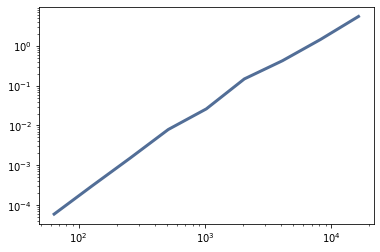

In [6]:
results = []
for N in ns:
    ts = (0.5 + np.arange(N)) / N
    freqs = (0.5 + np.arange(N)) / 2
    ys = noise.ys[:N]
    result = %timeit -r1 -o dct.analyze2(ys, freqs, ts)
    results.append(result)

bests2 = [result.best for result in results]
plot_bests(bests2)

如預期的那樣，analyze2的結果呈一條直線，估計斜率接近2。

scipy.fftpack.dct的結果。

6.27 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.72 µs ± 313 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.68 µs ± 560 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.91 µs ± 258 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.8 µs ± 375 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
18.9 µs ± 607 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
34 µs ± 254 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
71.1 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
133 µs ± 3.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


0.5589023828451706

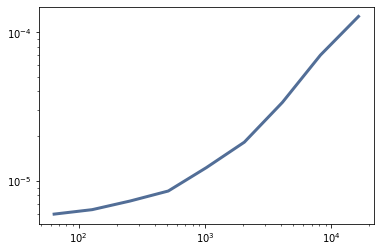

In [7]:
results = []
for N in ns:
    ys = noise.ys[:N]
    result = %timeit -o scipy.fftpack.dct(ys, type=3)
    results.append(result)

bests3 = [result.best for result in results]
plot_bests(bests3)

dct的這種實現甚至更快。這條線是彎曲的，這意味著要么我們還沒有看到漸近行為，要么漸近行為不是n的簡單指數。實際上，我們很快就會看到，運行時間與nlogn成正比。

下圖顯示了相同軸上的所有三個曲線。

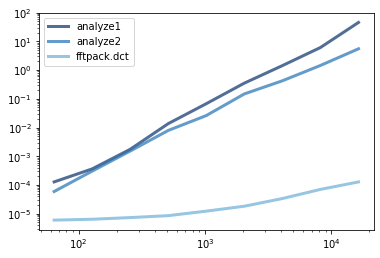

In [8]:
thinkplot.preplot(3)
thinkplot.plot(ns, bests, label='analyze1')
thinkplot.plot(ns, bests2, label='analyze2')
thinkplot.plot(ns, bests3, label='fftpack.dct')
thinkplot.config(xscale='log', yscale='log', legend=True, loc='upper left')